In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
from datetime import date, timedelta
# import package to ignore warning
import warnings
warnings.filterwarnings('ignore')

/Users/tianlei/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [8]:
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
plt.rcParams['figure.figsize'] = 7,8
train = train.drop(columns = ['YrBlt','Closing_Date','Listing_Date','Accept_Date'])
test = test.drop(columns = ['YrBlt','Closing_Date','Listing_Date','Accept_Date'])
test = test[(test['Freq'] != 'B') & (test['Freq'] != 'Q')]
test = test[(test['Area'] != 'San Jose') & (test['Area'] != 'SJOS - San Jose')]
train = train.fillna('(Missing)')
test = test.fillna('(Missing)')

In [9]:
train.columns

Index(['DOM', 'LP', 'SP', 'BT', 'SqFt', 'BR', 'Bth', 'Gar', 'GarSp', 'HOA_Fee',
       'Freq', 'Age', 'Area', 'Zip', 'Month_Accept_Date',
       'Week_in_month_Accept_Date', 'Month_Listing_Date',
       'Week_in_month_Listing_Date'],
      dtype='object')

### Identify Categorical Features and Numerical Features

In [14]:
num = ['DOM', 'LP','SqFt','Age','HOA_Fee']
cat = train.drop(columns = num+['SP']).columns

## Visualize Categorical Features

In [15]:
train[cat].nunique()

BT                             3
BR                             8
Bth                            5
Gar                            3
GarSp                         10
Freq                           3
Area                          14
Zip                           30
Month_Accept_Date             12
Week_in_month_Accept_Date      5
Month_Listing_Date            12
Week_in_month_Listing_Date     5
dtype: int64

In [32]:
train2 = train.copy()
train2['SP_per_Sq'] = train2['SP']/train2['SqFt']

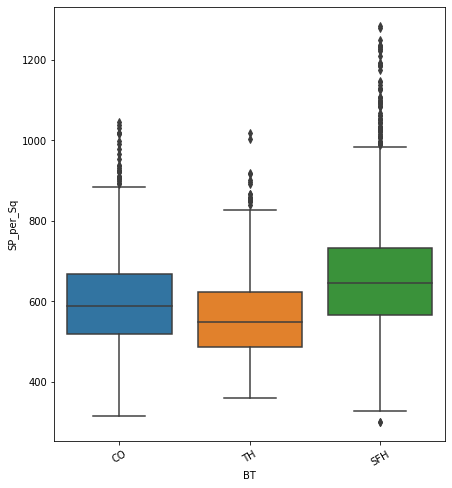

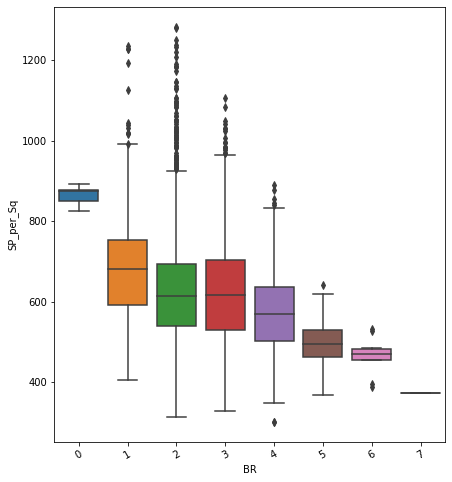

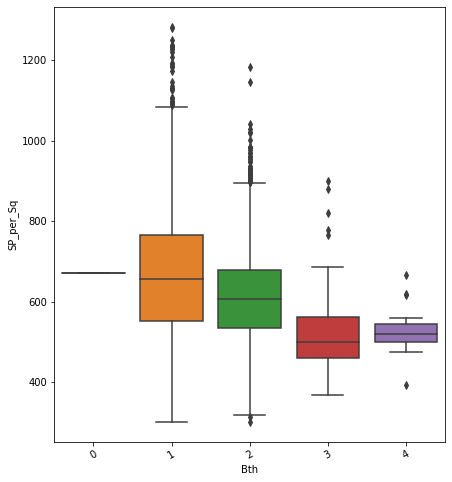

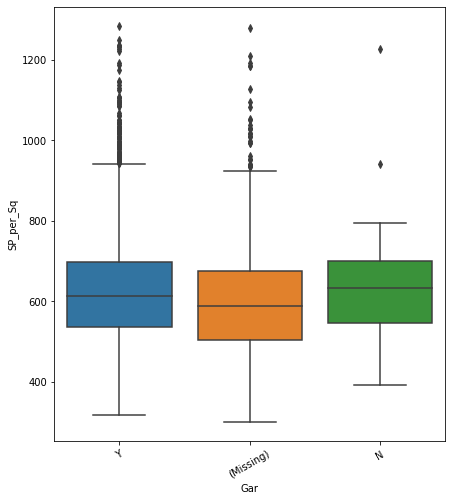

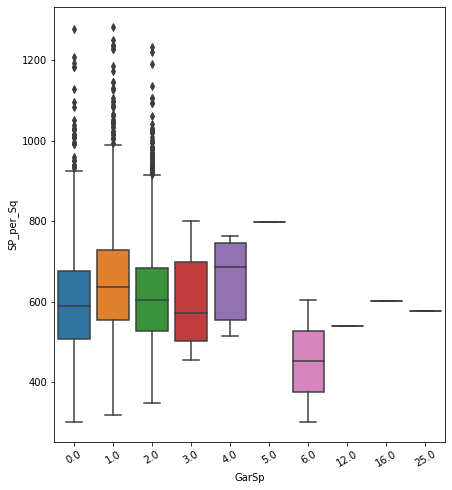

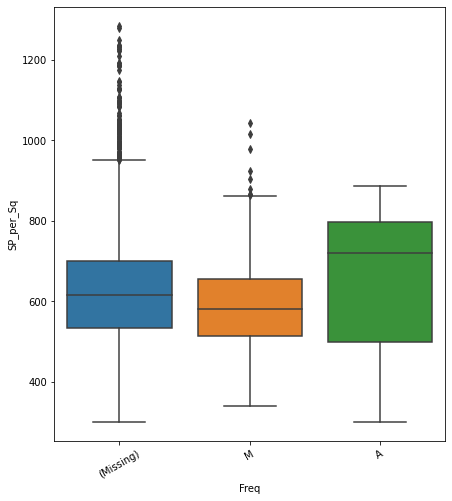

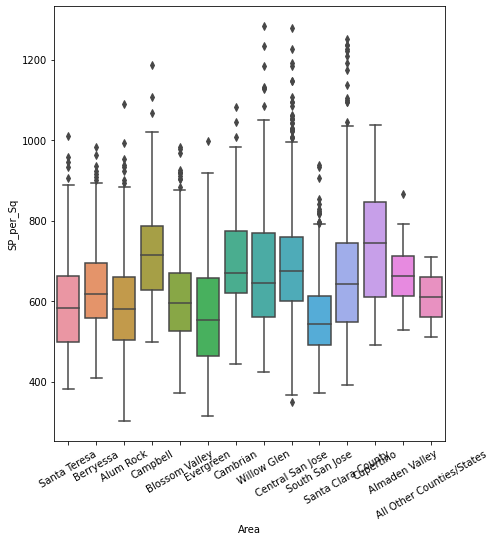

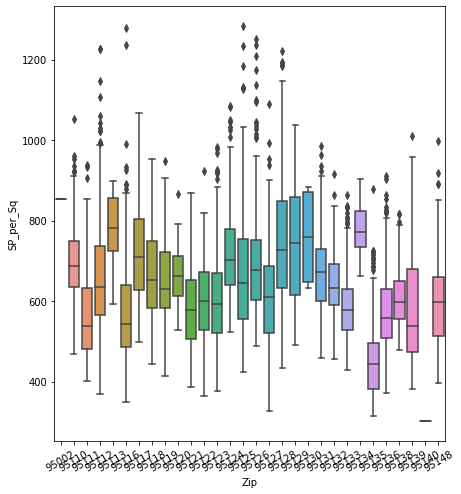

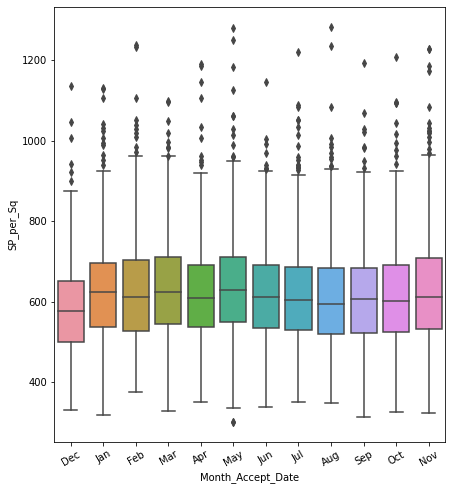

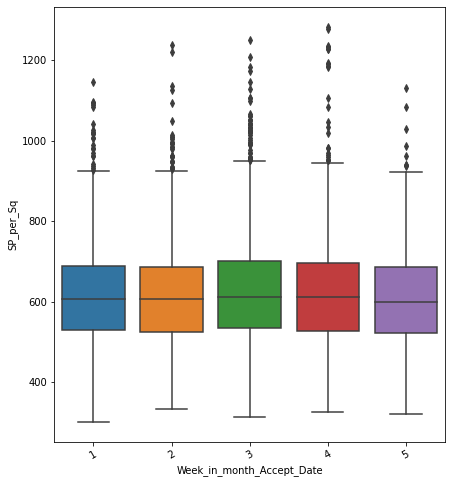

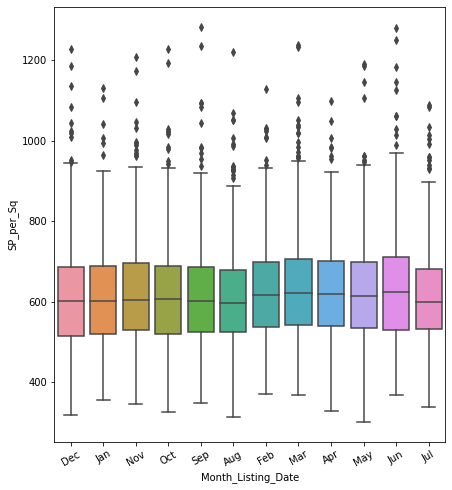

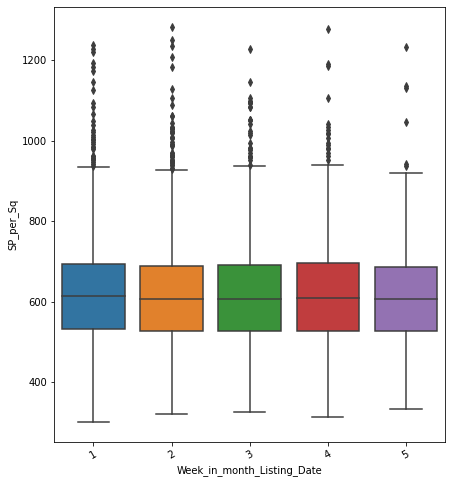

In [35]:
for col in cat:
    plt.figure()
    b = sns.boxplot(x = col, y = 'SP_per_Sq', data = train2.drop(columns = ['SqFt']))
    b.set_xticklabels(b.get_xticklabels(),rotation=30)
    b.figure.savefig('boxplot-'+ str(col)+'.png')

Above are boxplots of the values of selling price per square feet on each categorical feature. From the plots, we can see that week_in_month and month features don't seem to have huge impact on price per square feet, whereas area-related features (`Area` and `Zipcode`) and house attributes features (`BR`,`BT`, `Bth`, `GarSp`) seem to have larger impact on housing price.